# Evaluating 'Bestness' By Count of Smart Trash Cans

<span style="font-size: 14pt;">Smart trash containers as depolyed by the City of Pittsburgh increase efficiency of garbage collection, thus effectively improving the environmental condition of neighborhoods in Pittsburgh. The code below creates a bar chart that displays the neighborhoods in Pittsburgh and the number of smart trash containers in the neighborhood.

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

neighborhoods = pd.read_csv("pitt_neighborhoods.csv")
stc = pd.read_csv("smart-trash-cans.csv")

# count number of smart trash cans in neighborhoods in stc data set
counts = stc['neighborhood'].value_counts()

# zero if neighborhood doesn't exist in stc data set
for neighborhood in neighborhoods['hood']:
    if neighborhood not in counts:
        counts[neighborhood] = 0

plt.rcParams.update({'font.size': 100})

# create bar chart
pd.Series(counts).plot(kind='barh', rot=0.5, edgecolor='black', figsize=(100, 300))
plt.xlabel('Smart Trash Containers')  
plt.ylabel('Neighborhood')
plt.title('Smart Trash Containers Per Pittsburgh Neighborhood')  

# add count number at end of bars in bar chart
for i, count in enumerate(counts):
    plt.text(count, i, str(count), ha='left', va='center')

# Normalizing Smart Trash Container Counts

<span style="font-size: 14pt;">To easily evaluate the neighborhoods respective to each other, the count of smart trash containers are normalized on a scale of 0 to 10. The code below shows the normalization.

In [15]:
pd.set_option('display.max_rows', None)
scores = 0 + (((counts - counts.min()) * (10 - 0)) / (counts.max() - counts.min()))
pd.DataFrame({'neighborhood': scores.index, 'score': scores},  index=counts.index)

neighborhood      score
Shadyside                                  Shadyside  10.000000
East Liberty                            East Liberty   8.947368
Squirrel Hill South              Squirrel Hill South   8.289474
Bloomfield                                Bloomfield   7.631579
North Shore                              North Shore   6.973684
South Side Flats                    South Side Flats   6.710526
Strip District                        Strip District   5.526316
Carrick                                      Carrick   5.000000
Central Oakland                      Central Oakland   4.473684
Lower Lawrenceville              Lower Lawrenceville   3.815789
Middle Hill                              Middle Hill   3.815789
Central Lawrenceville          Central Lawrenceville   3.815789
Homewood South                        Homewood South   3.684211
Bluff                                          Bluff   3.684211
East Allegheny                        East Allegheny   3.421053
Mount Washington                    Mount Washington   3.289474
Brighton Heights                    Brighton Heights   3.157895
Squirrel Hill North              Squirrel Hill North   2.894737
Crawford-Roberts                    Crawford-Roberts   2.763158
Larimer                                      Larimer   2.631579
Hazelwood                                  Hazelwood   2.368421
Brookline                                  Brookline   2.236842
Marshall-Shadeland                Marshall-Shadeland   2.236842
Sheraden                                    Sheraden   2.105263
Troy Hill                                  Troy Hill   1.973684
Allegheny West                        Allegheny West   1.973684
Perry North                              Perry North   1.973684
Upper Lawrenceville              Upper Lawrenceville   1.973684
Greenfield                                Greenfield   1.842105
North Oakland                          North Oakland   1.842105
Polish Hill                              Polish Hill   1.710526
Point Breeze                            Point Breeze   1.578947
Perry South                              Perry South   1.578947
Elliott                                      Elliott   1.578947
Highland Park                          Highland Park   1.578947
Friendship                                Friendship   1.578947
Central Northside                  Central Northside   1.315789
Regent Square                          Regent Square   1.184211
West End                                    West End   1.184211
Allentown                                  Allentown   1.184211
Beechview                                  Beechview   1.052632
West Oakland                            West Oakland   1.052632
South Side Slopes                  South Side Slopes   1.052632
Crafton Heights                      Crafton Heights   1.052632
Morningside                              Morningside   1.052632
Upper Hill                                Upper Hill   0.921053
Central Business District  Central Business District   0.921053
Allegheny Center                    Allegheny Center   0.921053
Lincoln Place                          Lincoln Place   0.921053
Knoxville                                  Knoxville   0.921053
South Oakland                          South Oakland   0.921053
Garfield                                    Garfield   0.921053
Manchester                                Manchester   0.789474
Lincoln-Lemington-Belmar    Lincoln-Lemington-Belmar   0.789474
Chateau                                      Chateau   0.657895
Terrace Village                      Terrace Village   0.657895
Spring Hill-City View          Spring Hill-City View   0.657895
Westwood                                    Westwood   0.657895
Homewood North                        Homewood North   0.526316
California-Kirkbride            California-Kirkbride   0.526316
Fineview                                    Fineview   0.394737
Beltzhoover                              Beltzhoover   0.394737
Arlingto

Text(0.5, 1.0, 'Geographical Heatmap of Scores')

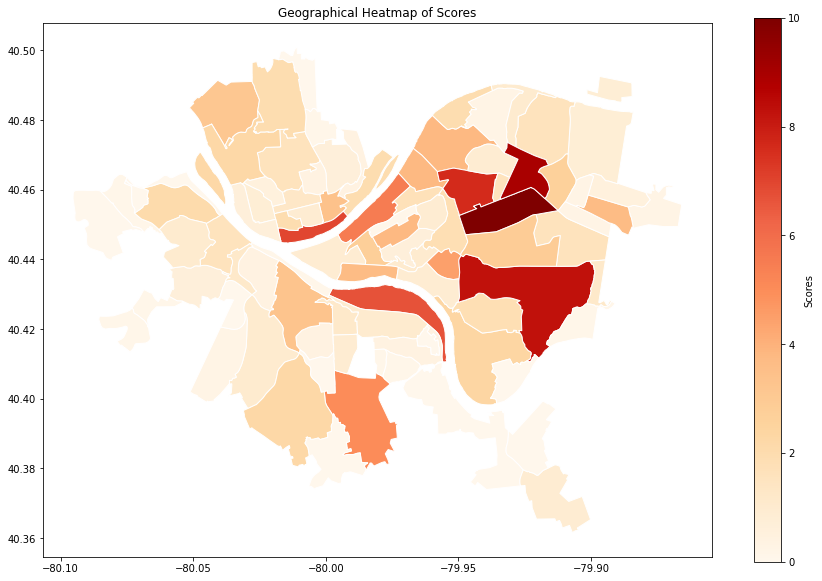

In [12]:
import geopandas
%matplotlib inline

neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

score_map = neighborhoods.merge(pd.DataFrame({'neighborhood': scores.index, 'score': scores}), how='left', left_on='hood', right_on='neighborhood')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
score_map.plot(column='score', cmap='OrRd', edgecolor="white", legend=True, legend_kwds={'label': "Scores"}, ax=ax)
ax.set_title('Geographical Heatmap of Scores')  

Shad